## import data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
folder_name = "data/"

# Define the files and parameters
params = [0.5, 0.75, 1, 1.25, 1.5]
shadow_unmitigated_files = ["shadow_unmitigated__L" + str(i) + "_R1000_S1000.csv" for i in params]
shadow_mitigated_files = ["shadow_mitigated__L" + str(i) + "_R1000_S1000.csv" for i in params]
hadamard_unmitigated_files = ["hadamard_unmitigated__L" + str(i) + "_S5.csv" for i in params]
hadamard_mitigated_files = ["hadamard_mitigated__L" + str(i) + "_S5.csv" for i in params]

# Define the columns to process
columns = ["s_off", "h_off", "h_diag", "s0", "t1"]

# Define the true values
true_value_dict = {
    's_off': 0.8947241928, 'h_off': -0.954451, 'h_diag': -1.0416665, 's0': -1.053513, 't1': -0.8284433437
}

def calculate_stats(files, columns):
    stats = {f"{col}_mean": [] for col in columns}
    stats.update({f"{col}_std": [] for col in columns})
    stats.update({f"{col}_mse": [] for col in columns})
    stats.update({f"{col}_mse_std": [] for col in columns})

    for file in files:
        data = pd.read_csv(folder_name + file)
        for column in columns:
            mean_value = np.mean(data[column])
            std_value = np.std(data[column])
            mse_value = np.mean((data[column] - true_value_dict[column]) ** 2)
            mse_std_value = np.sqrt(sum(((data[column] - true_value_dict[column]) ** 2 - mse_value)**2))/10
            stats[f"{column}_mean"].append(mean_value)
            stats[f"{column}_std"].append(std_value)
            stats[f"{column}_mse"].append(mse_value)
            stats[f"{column}_mse_std"].append(mse_std_value)

    return stats

# Calculate stats for shadow and hadamard, both unmitigated and mitigated
shadow_unmitigated_stats = calculate_stats(shadow_unmitigated_files, columns)
shadow_mitigated_stats = calculate_stats(shadow_mitigated_files, columns)
hadamard_unmitigated_stats = calculate_stats(hadamard_unmitigated_files, columns)
hadamard_mitigated_stats = calculate_stats(hadamard_mitigated_files, columns)

# Create DataFrames
shadow_unmitigated_df = pd.DataFrame(shadow_unmitigated_stats)
shadow_mitigated_df = pd.DataFrame(shadow_mitigated_stats)
hadamard_unmitigated_df = pd.DataFrame(hadamard_unmitigated_stats)
hadamard_mitigated_df = pd.DataFrame(hadamard_mitigated_stats)

## Plot

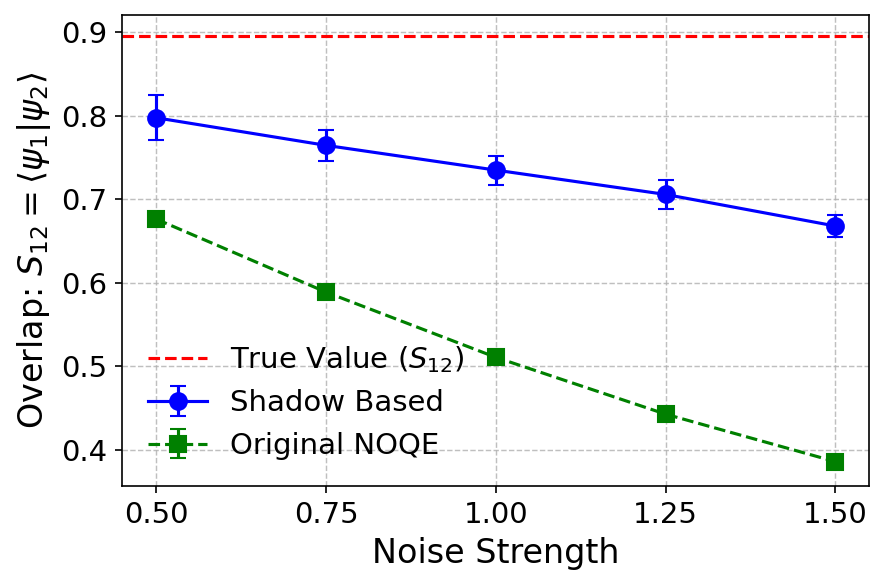

In [4]:
import numpy as np

plt.figure(figsize=(6, 4), dpi=150)  # High resolution (150 dpi)

# Plot error bars for each dataset
plt.errorbar(params, shadow_unmitigated_df["s_off_mean"], yerr=shadow_unmitigated_std, 
             label="Shadow Based", marker='o', linestyle='-', color='blue', capsize=4, markersize=8, linewidth=1.5)
plt.errorbar(params, hadamard_unmitigated_df["s_off_mean"], yerr=hadamard_unmitigated_std, 
             label="Original NOQE", marker='s', linestyle='--', color='green', capsize=4, markersize=8, linewidth=1.5)

# Optional: Uncomment below lines for additional datasets
# plt.errorbar(params, shadow_mitigated_df["s_off_mean"], yerr=shadow_mitigated_std, 
#              label="Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=4, markersize=8, linewidth=1.5)
# plt.errorbar(params, hadamard_mitigated_df["s_off_mean"], yerr=hadamard_mitigated_std, 
#              label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=4, markersize=8, linewidth=1.5)

# Reference line for the true value
plt.axhline(y=true_value_dict["s_off"], color='red', linestyle='--', linewidth=1.5, label='True Value ($S_{12}$)')

# Axis labels with appropriate font sizes
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'Overlap: $S_{12} = \langle \psi_1 | \psi_2 \rangle$', fontsize=16)

# Set custom x-ticks
custom_xticks = [0.5, 0.75, 1.0, 1.25, 1.5]
plt.xticks(custom_xticks, fontsize=14)  # Apply custom ticks with desired fontsize
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)

# Tick adjustments for y-axis
plt.yticks(fontsize=14)

# Legend adjustments
plt.legend(fontsize=14, frameon=False, loc='lower left')  # Larger font for legend

# Adjust layout for compactness
plt.tight_layout()
#plt.savefig("figures/s_off_comparison.pdf")  # Save as a PDF in the figures folder
plt.show()

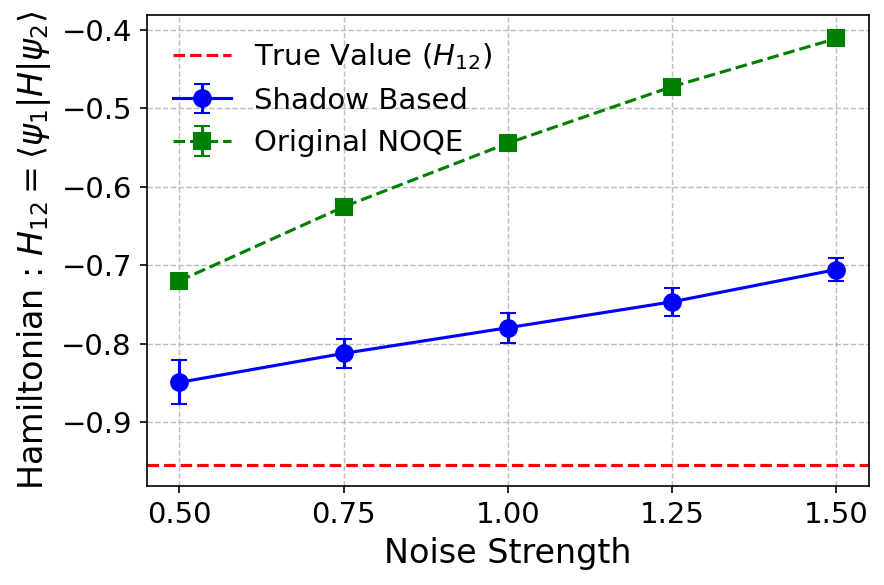

In [5]:
y_column = "h_off"  # Change this to "h_off" for plotting h_off

shadow_unmitigated_std = shadow_unmitigated_df[f"{y_column}_std"]
hadamard_unmitigated_std = hadamard_unmitigated_df[f"{y_column}_std"]

plt.figure(figsize=(6, 4), dpi=150)  # High resolution (150 dpi)

# Plot error bars for each dataset
plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, 
             label="Shadow Based", marker='o', linestyle='-', color='blue', capsize=4, markersize=8, linewidth=1.5)
plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, 
             label="Original NOQE", marker='s', linestyle='--', color='green', capsize=4, markersize=8, linewidth=1.5)

# Optional: Uncomment below lines for additional datasets
# plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, 
#              label="Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=4, markersize=8, linewidth=1.5)
# plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, 
#              label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=4, markersize=8, linewidth=1.5)

# Reference line for the true value
plt.axhline(y=true_value_dict[y_column], color='red', linestyle='--', linewidth=1.5, label='True Value ($H_{12}$)')

# Axis labels with appropriate font sizes
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'Hamiltonian : $H_{12}=\langle \psi_1 |H| \psi_2 \rangle$', fontsize=16)

# Set custom x-ticks
custom_xticks = [0.5, 0.75, 1.0, 1.25, 1.5]
plt.xticks(custom_xticks, fontsize=14)  # Apply custom ticks with desired fontsize
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)

# Tick adjustments for y-axis
plt.yticks(fontsize=14)

# Legend adjustments
plt.legend(fontsize=14, frameon=False, loc='upper left')  # Larger font for legend

# Adjust layout for compactness
plt.tight_layout()
#plt.savefig("figures/h_off_comparison.pdf")  # Save as a PDF in the figures folder
plt.show()


C:\Users\17102\AppData\Local\Temp\ipykernel_55064\839047649.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


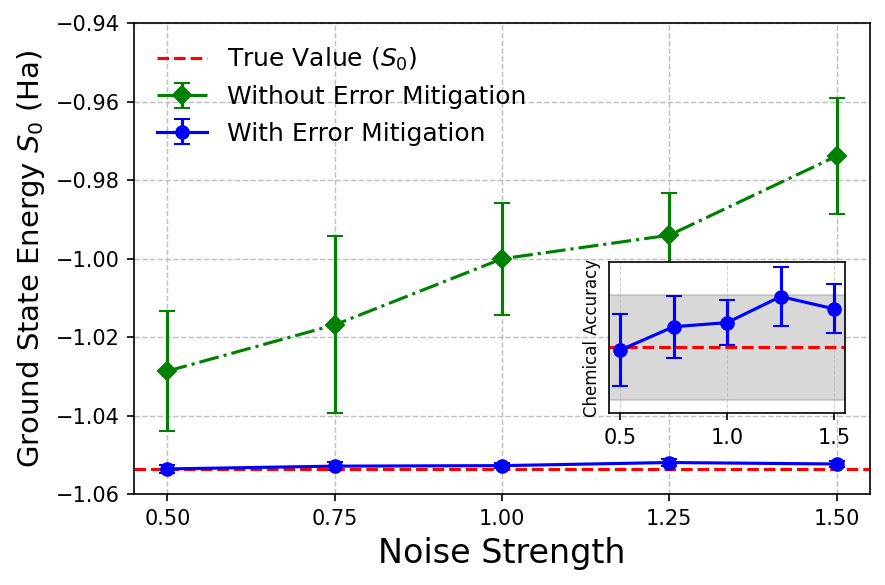

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Example data from your variables (replace these with your actual data)
params = [0.5, 0.75, 1, 1.25, 1.5]  # Noise strengths

true_value = -1.053513  # True value for S0
tolerance = 0.0016  # Chemical accuracy tolerance

# Extract means and standard deviations from your data
shadow_unmitigated_means = shadow_unmitigated_df["s0_mean"]
shadow_unmitigated_std = shadow_unmitigated_df["s0_std"]
shadow_mitigated_means = shadow_mitigated_df["s0_mean"]
shadow_mitigated_std = shadow_mitigated_df["s0_std"]

# Create the main figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

# Main plot
ax.errorbar(params, shadow_unmitigated_means, yerr=shadow_unmitigated_std,
            label="Without Error Mitigation", marker='D', linestyle='-.', color='green', capsize=4, markersize=6, linewidth=1.5)
ax.errorbar(params, shadow_mitigated_means, yerr=shadow_mitigated_std,
            label="With Error Mitigation", marker='o', linestyle='-', color='blue', capsize=4, markersize=6, linewidth=1.5)
ax.axhline(y=true_value, color='red', linestyle='--', linewidth=1.5, label='True Value ($S_0$)')

# Set main plot labels and scales
ax.set_xlabel('Noise Strength', fontsize=16)
ax.set_ylabel(r'Ground State Energy $S_0$ (Ha)', fontsize=14)
ax.set_xticks(params)
ax.set_yticks(np.arange(-1.06, -0.94, 0.02))
ax.set_ylim(-1.06, -0.94)
ax.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
ax.legend(fontsize=12, frameon=False, loc='upper left')

# Add inset plot
# ax_inset = inset_axes(ax, width="35%", height="25%", loc='center right', borderpad=2)
ax_inset = inset_axes(ax, width="40%", height="40%", 
                      bbox_to_anchor=(0.18, 0.15, 0.8, 0.8),  # (x0, y0, width, height)
                      bbox_transform=ax.transAxes,  # Relative to the main plot
                      loc='lower right')  # Anchor location
ax_inset.errorbar(params, shadow_mitigated_means, yerr=shadow_mitigated_std,
                  label="With Error Mitigation", marker='o', linestyle='-', color='blue', capsize=4, markersize=6, linewidth=1.5)
ax_inset.axhline(y=true_value, color='red', linestyle='--', linewidth=1.5, label='True Value ($S_0$)')
ax_inset.fill_between([0.4, 1.6], true_value - tolerance, true_value + tolerance,
                      color='gray', alpha=0.3, label="$S_0$ ± 0.0016 (Chemical Accuracy)")

# Customize inset plot
ax_inset.set_xlim(0.45, 1.55)
ax_inset.set_ylim(true_value - 0.002, true_value + 0.0026)
ax_inset.set_xticks([0.5, 1, 1.5])
ax_inset.set_yticks([])  # Remove y-ticks for inset
ax_inset.set_ylabel("Chemical Accuracy", fontsize=8) 
ax_inset.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.6)

# Adjust layout and show
plt.tight_layout()
plt.savefig("figures/s0_em_zoomin.pdf", format="pdf", dpi=300)
plt.show()

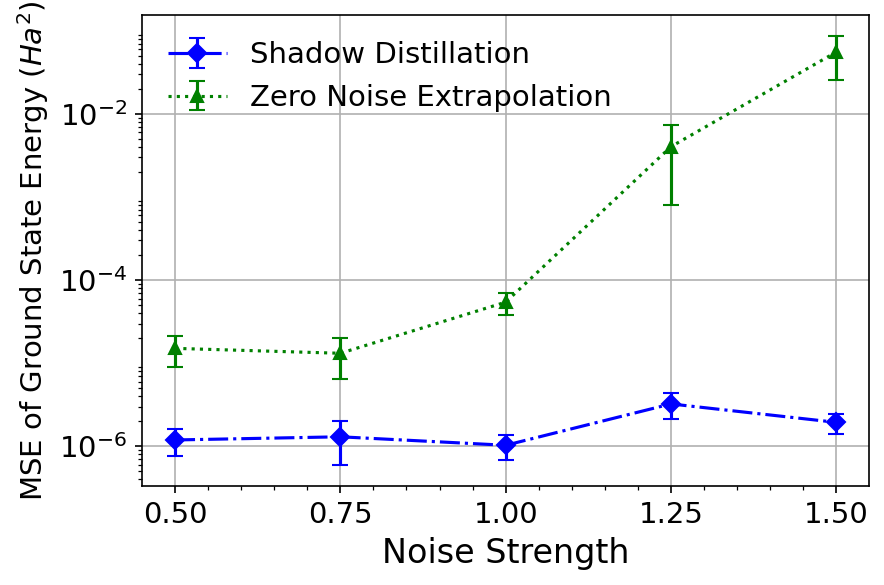

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=150)  # High resolution and compact size

params = [0.5, 0.75, 1, 1.25, 1.5]

# Plotting the data with error bars
plt.errorbar(
    params,
    shadow_mitigated_df["s0_mse"],
    yerr=shadow_mitigated_df["s0_mse_std"],
    label="Shadow Distillation",
    marker='D',
    linestyle='-.',
    color='blue',
    markersize=6,
    linewidth=1.5,
    capsize=4  # Adds caps to error bars
)

plt.errorbar(
    params,
    hadamard_mitigated_df["s0_mse"],
    yerr=hadamard_mitigated_df["s0_mse_std"],
    label="Zero Noise Extrapolation",
    marker='^',
    linestyle=':',
    color='green',
    markersize=6,
    linewidth=1.5,
    capsize=4  # Adds caps to error bars
)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Axis labels with updated font size
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'MSE of Ground State Energy $(Ha^2)$', fontsize=14)

# Display legend with increased font size and improved placement
plt.legend(fontsize=14, loc='upper left', frameon=False)

# Custom x-ticks and y-ticks
plt.xticks([0.5, 0.75, 1, 1.25, 1.5], fontsize=14)
plt.yticks([1e-6, 1e-4, 1e-2], labels=[r'$10^{-6}$', r'$10^{-4}$', r'$10^{-2}$'], fontsize=14)

# Grid customization
plt.grid(True)

# Minor ticks to enhance grid density
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

# Adjust layout for compactness
plt.tight_layout()

plt.savefig('figures/mse_s0_comparison.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()

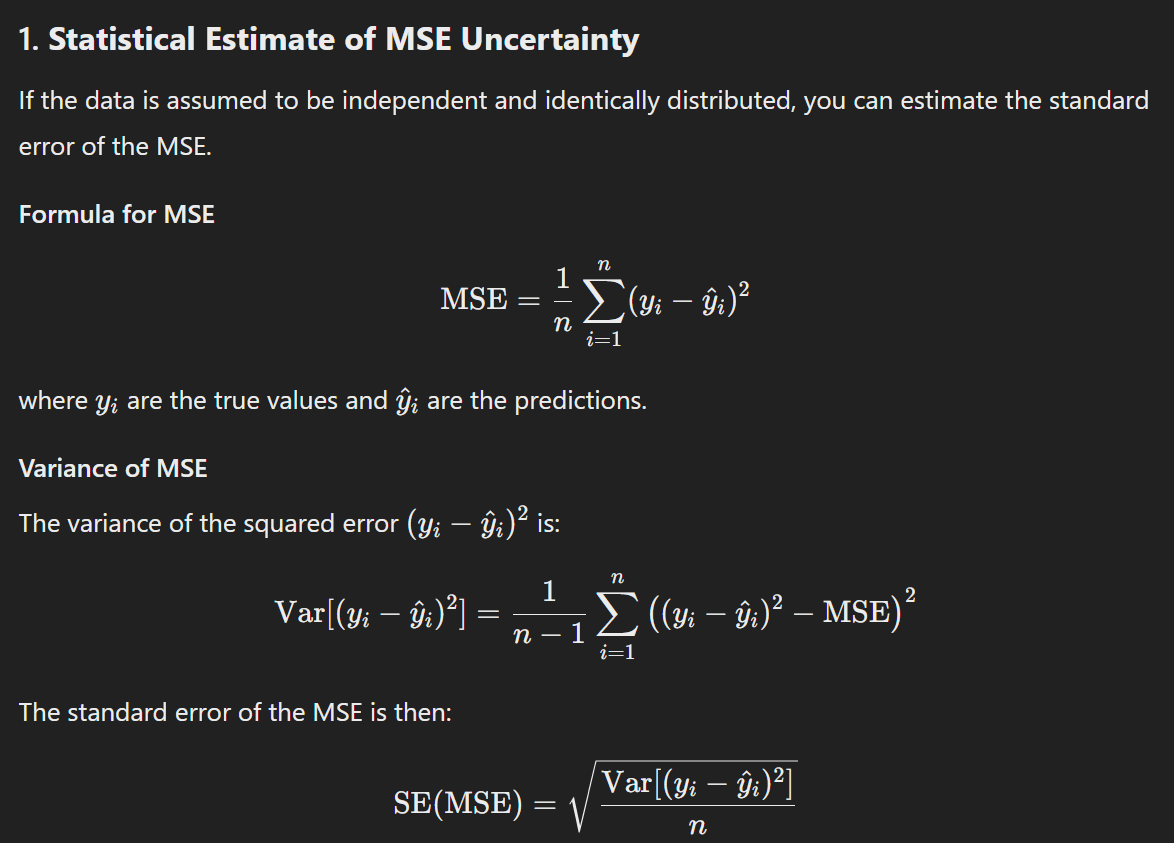

## Other figures

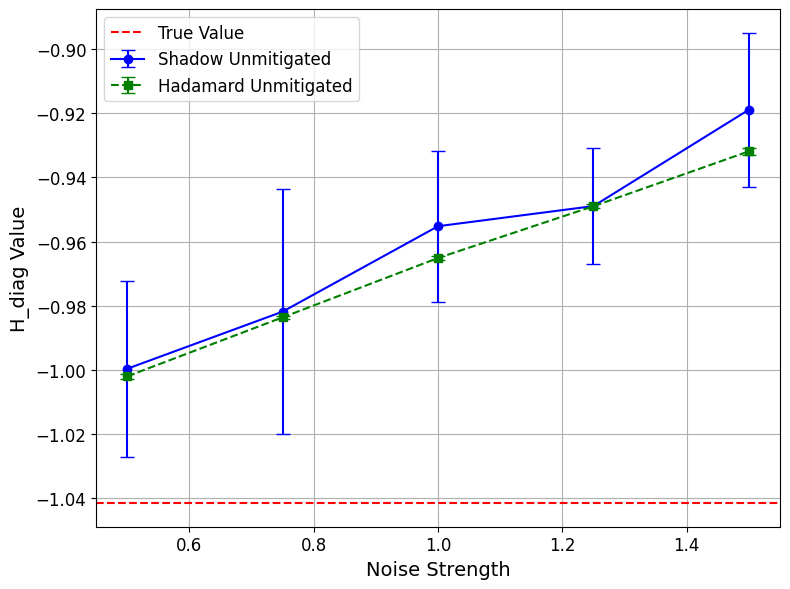

In [6]:
y_column = "h_diag"  # Change this to "h_off" for plotting h_off

shadow_unmitigated_std = shadow_unmitigated_df[f"{y_column}_std"]
hadamard_unmitigated_std = hadamard_unmitigated_df[f"{y_column}_std"]
shadow_mitigated_std = shadow_mitigated_df[f"{y_column}_std"]
hadamard_mitigated_std = hadamard_mitigated_df[f"{y_column}_std"]

plt.figure(figsize=(8, 6))

plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, label="Shadow Unmitigated", marker='o', linestyle='-', color='blue', capsize=5)
plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, label="Hadamard Unmitigated", marker='s', linestyle='--', color='green', capsize=5)
#plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, label="Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=5)
#plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=5)

plt.axhline(y=true_value_dict[y_column], color='red', linestyle='dashed', label='True Value')

plt.xlabel('Noise Strength', fontsize=14)
plt.ylabel(f'{y_column.capitalize()} Value', fontsize=14)
#plt.title(f'Comparison of {y_column.capitalize()} under Different Noise Mitigation Strategies', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

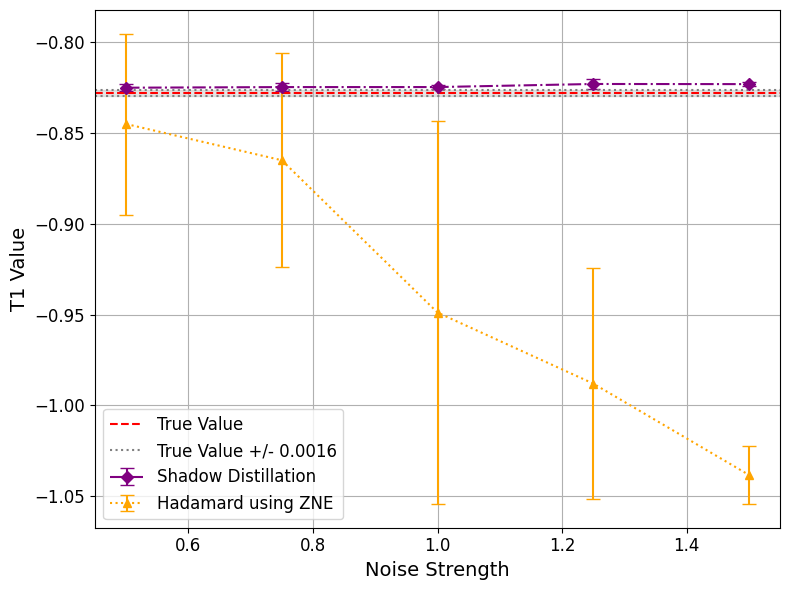

In [7]:
y_column = "t1"  # Change this to "h_off" for plotting h_off
shadow_unmitigated_std = shadow_unmitigated_df[f"{y_column}_std"]
#hadamard_unmitigated_std = hadamard_unmitigated_df[f"{y_column}_std"]
hadamard_mitigated_std = hadamard_mitigated_df[f"{y_column}_std"]
shadow_mitigated_std = shadow_mitigated_df[f"{y_column}_std"]

plt.figure(figsize=(8, 6))

#plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, label="Shadow Unmitigated", marker='o', linestyle='-', color='blue', capsize=5)
#plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, label="Hadamard Unmitigated", marker='s', linestyle='--', color='green', capsize=5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, label="Shadow Distillation", marker='D', linestyle='-.', color='purple', capsize=5)
plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, label="Hadamard using ZNE", marker='^', linestyle=':', color='orange', capsize=5)

#plot a horizontal band for the range of acceptable values of s0- 0.0016 and s0+0.0016

plt.axhline(y=true_value_dict[y_column], color='red', linestyle='dashed', label='True Value')
plt.axhline(y=true_value_dict[y_column]+0.0016, color='grey', linestyle='dotted', label='True Value +/- 0.0016')
plt.axhline(y=true_value_dict[y_column]-0.0016, color='grey', linestyle='dotted')

plt.fill_between([0.4, 1.6], true_value_dict[y_column]-0.0016, true_value_dict[y_column]+0.0016, color='grey', alpha=0.2)

plt.xlabel('Noise Strength', fontsize=14)
plt.ylabel(f'{y_column.capitalize()} Value', fontsize=14)
#plt.title(f'Comparison of {y_column.capitalize()} under Different Noise Mitigation Strategies', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.yscale('symlog', linthresh=1, linscale=0.5)
#plt.ylim(-1.07, -1.04)
plt.xlim(0.45, 1.55)

plt.tight_layout()
plt.show()

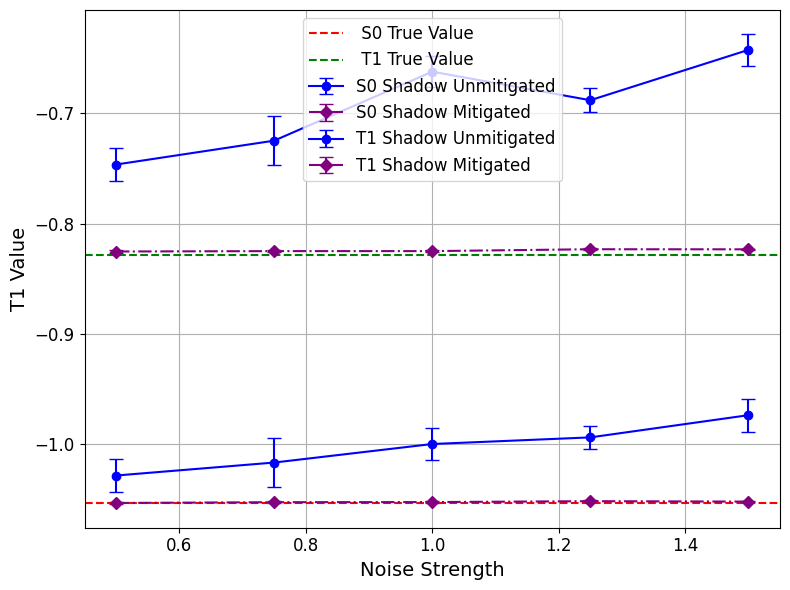

In [8]:
y_column = "s0"  # Change this to "h_off" for plotting h_off
shadow_unmitigated_std = shadow_unmitigated_df[f"{y_column}_std"]
#hadamard_unmitigated_std = hadamard_unmitigated_df[f"{y_column}_std"]
# hadamard_mitigated_std = hadamard_mitigated_df[f"{y_column}_std"]
shadow_mitigated_std = shadow_mitigated_df[f"{y_column}_std"]

plt.figure(figsize=(8, 6))

plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, label="S0 Shadow Unmitigated", marker='o', linestyle='-', color='blue', capsize=5)
#plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, label="Hadamard Unmitigated", marker='s', linestyle='--', color='green', capsize=5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, label="S0 Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=5)
#plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=5)

y_column = "t1" 
plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, label="T1 Shadow Unmitigated", marker='o', linestyle='-', color='blue', capsize=5)
#plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, label="Hadamard Unmitigated", marker='s', linestyle='--', color='green', capsize=5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, label="T1 Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=5)
#plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=5)

plt.axhline(y=true_value_dict["s0"], color='red', linestyle='dashed', label=' S0 True Value')
plt.axhline(y=true_value_dict["t1"], color='green', linestyle='dashed', label=' T1 True Value')

plt.xlabel('Noise Strength', fontsize=14)
plt.ylabel(f'{y_column.capitalize()} Value', fontsize=14)
#plt.title(f'Comparison of {y_column.capitalize()} under Different Noise Mitigation Strategies', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.yscale('symlog', linthresh=1, linscale=0.5)
# plt.ylim(-1.2, -0.9)

plt.tight_layout()
plt.show()

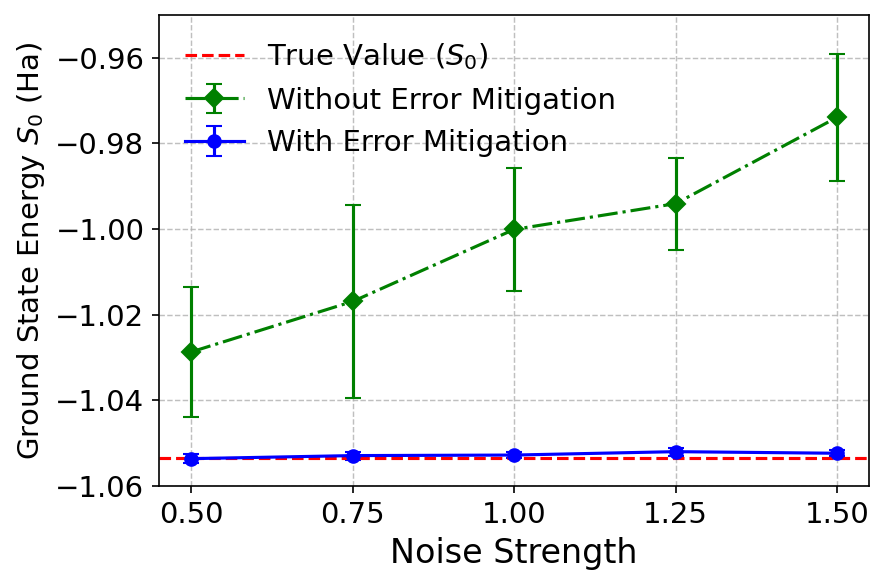

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)  # High resolution and compact size

y_column = "s0"  # Change this to "h_off" for plotting h_off
# Plot error bars for the unmitigated and mitigated datasets
plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, 
             label="Without Error Mitigation", marker='D', linestyle='-.', color='green', capsize=4, markersize=6, linewidth=1.5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, 
             label="With Error Mitigation", marker='o', linestyle='-', color='blue', capsize=4, markersize=6, linewidth=1.5)

# Reference line for the true value
plt.axhline(y=true_value_dict["s0"], color='red', linestyle='--', linewidth=1.5, label='True Value ($S_0$)')

# Axis labels
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'Ground State Energy $S_0$ (Ha)', fontsize=14)

# Custom x-ticks
plt.xticks([0.5, 0.75, 1, 1.25, 1.5], fontsize=14)

# Y-axis ticks adjustments (optional, if needed)
plt.yticks(fontsize=14)

# Legend adjustments
plt.legend(fontsize=14, frameon=False, loc='upper left')

#plt.ylim(-1.1, -0.6)  # Limit the y-axis range for better visibility
# Grid customization
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.ylim(-1.06, -0.95)
# Layout adjustments for compactness
plt.tight_layout()

# Save the plot as a vector graphic
#plt.savefig("figures/s0_comparison_EM.pdf", format="pdf", dpi=300)

# Show the plot
plt.show()

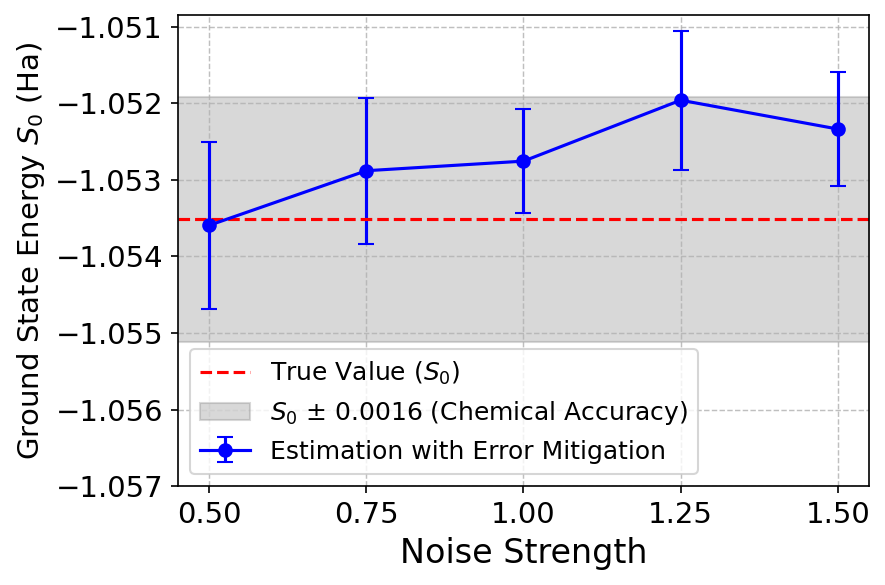

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)  # High resolution and compact size

y_column = "s0"  # Change this to "h_off" for plotting h_off

# Plot error bars for the mitigated dataset
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, 
             label="Estimation with Error Mitigation", marker='o', linestyle='-', color='blue', capsize=4, markersize=6, linewidth=1.5)

# Reference line for the true value
plt.axhline(y=true_value_dict["s0"], color='red', linestyle='--', linewidth=1.5, label='True Value ($S_0$)')

# Add a grey envelope around the true value ± 0.0016
true_value = true_value_dict["s0"]
plt.fill_between([0.4, 1.6], true_value - 0.0016, true_value + 0.0016, color='gray', alpha=0.3, label="$S_0$ ± 0.0016 (Chemical Accuracy)")

# Axis labels
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel('Ground State Energy $S_0$ (Ha)', fontsize=14)

# Custom x-ticks
plt.xticks([0.5, 0.75, 1, 1.25, 1.5], fontsize=14)

# Y-axis ticks adjustments
y_ticks = np.arange(-1.057, -1.051, 0.001)  # Adjust interval here
plt.yticks(y_ticks, fontsize=14)
plt.xlim(0.45, 1.55)

# Legend adjustments
plt.legend(fontsize=12, frameon=True, loc='lower left')

# Grid customization
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)

# Set y-axis limits for better visibility
#plt.ylim(-1.055, -1.045)

# Adjust layout for compactness
plt.tight_layout()

# Save the plot as a vector graphic
#plt.savefig("figures/s0_comparison_chemical_accuracy.pdf", format="pdf", dpi=300)

# Show the plot
plt.show()

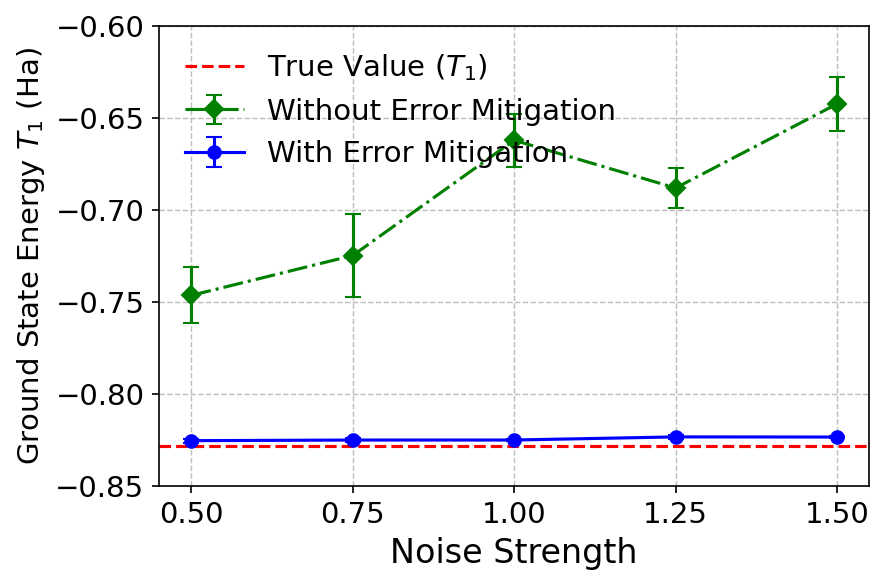

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)  # High resolution and compact size

y_column = "t1"
# Plot error bars for the unmitigated and mitigated datasets
plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, 
             label="Without Error Mitigation", marker='D', linestyle='-.', color='green', capsize=4, markersize=6, linewidth=1.5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, 
             label="With Error Mitigation", marker='o', linestyle='-', color='blue', capsize=4, markersize=6, linewidth=1.5)

# Reference line for the true value
plt.axhline(y=true_value_dict["t1"], color='red', linestyle='--', linewidth=1.5, label='True Value ($T_1$)')

# Axis labels
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'Ground State Energy $T_1$ (Ha)', fontsize=14)

# Custom x-ticks
plt.xticks([0.5, 0.75, 1, 1.25, 1.5], fontsize=14)

# Y-axis ticks adjustments (optional, if needed)
plt.yticks(fontsize=14)

# Legend adjustments
plt.legend(fontsize=14, frameon=False, loc='upper left')

# Grid customization
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.ylim(-0.85, -0.6)

# Layout adjustments for compactness
plt.tight_layout()

# Save the plot as a vector graphic
#plt.savefig("figures/t1_comparison_EM.pdf", format="pdf", dpi=300)

# Show the plot
plt.show()

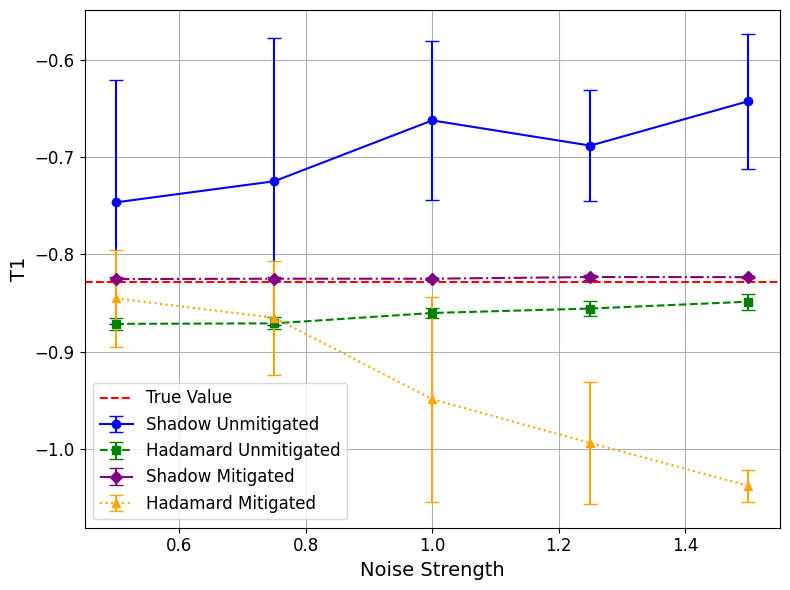

In [10]:
y_column = "t1"  # Change this to "h_off" for plotting h_off
shadow_unmitigated_std = shadow_unmitigated_df[f"{y_column}_std"]
hadamard_unmitigated_std = hadamard_unmitigated_df[f"{y_column}_std"]
hadamard_mitigated_std = hadamard_mitigated_df[f"{y_column}_std"]
shadow_mitigated_std = shadow_mitigated_df[f"{y_column}_std"]

plt.figure(figsize=(8, 6))

plt.errorbar(params, shadow_unmitigated_df[f"{y_column}_mean"], yerr=shadow_unmitigated_std, label="Shadow Unmitigated", marker='o', linestyle='-', color='blue', capsize=5)
plt.errorbar(params, hadamard_unmitigated_df[f"{y_column}_mean"], yerr=hadamard_unmitigated_std, label="Hadamard Unmitigated", marker='s', linestyle='--', color='green', capsize=5)
plt.errorbar(params, shadow_mitigated_df[f"{y_column}_mean"], yerr=shadow_mitigated_std, label="Shadow Mitigated", marker='D', linestyle='-.', color='purple', capsize=5)
plt.errorbar(params, hadamard_mitigated_df[f"{y_column}_mean"], yerr=hadamard_mitigated_std, label="Hadamard Mitigated", marker='^', linestyle=':', color='orange', capsize=5)

plt.axhline(y=true_value_dict[y_column], color='red', linestyle='dashed', label='True Value')

plt.xlabel('Noise Strength', fontsize=14)
plt.ylabel('T1', fontsize=14)
#plt.title(f'Comparison of {y_column.capitalize()} under Different Noise Mitigation Strategies', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.yscale('symlog', linthresh=1, linscale=0.5)
# plt.ylim(-1.2, -0.9)

plt.tight_layout()
plt.show()

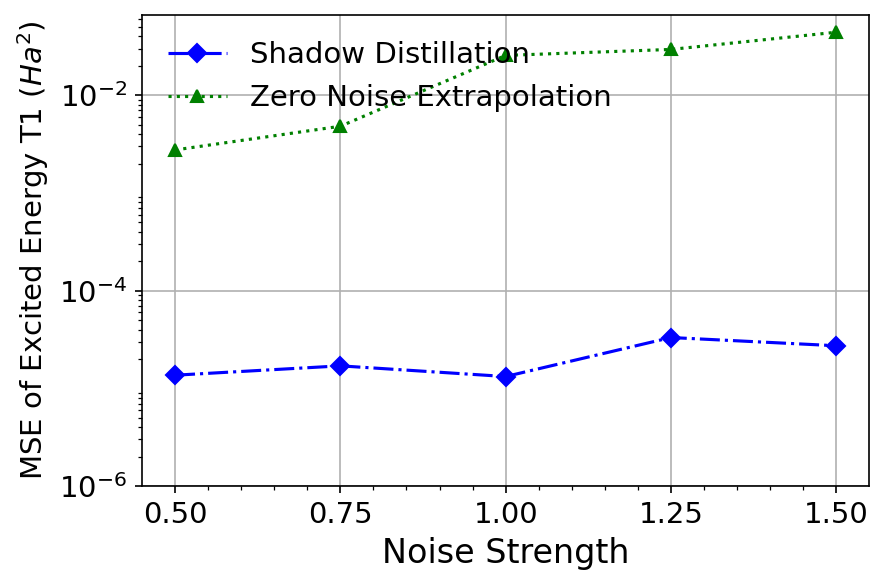

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=150)  # High resolution and compact size

params = [0.5, 0.75, 1, 1.25, 1.5]

# Plotting the data with updated labels and colors
plt.plot(params, shadow_mitigated_df["t1_mse"], label="Shadow Distillation", marker='D', linestyle='-.', color='blue', markersize=6, linewidth=1.5)
plt.plot(params, hadamard_mitigated_df["t1_mse"], label="Zero Noise Extrapolation", marker='^', linestyle=':', color='green', markersize=6, linewidth=1.5)

# Setting logarithmic scale for y-axis
plt.yscale('log')

# Axis labels with updated font size
plt.xlabel('Noise Strength', fontsize=16)
plt.ylabel(r'MSE of Excited Energy T1 $(Ha^2)$', fontsize=14)

# Display legend with increased font size and improved placement
plt.legend(fontsize=14, loc='upper left', frameon=False)

# Custom x-ticks and y-ticks
plt.xticks([0.5, 0.75, 1, 1.25, 1.5], fontsize=14)
plt.yticks([1e-6, 1e-4, 1e-2], labels=[r'$10^{-6}$', r'$10^{-4}$', r'$10^{-2}$'], fontsize=14)

# Grid customization
#plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.grid(True)

# Minor ticks to enhance grid density
plt.minorticks_on()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

# Adjust layout for compactness
plt.tight_layout()

# Save the plot as vector graphics
plt.savefig('figures/mse_t1_comparison.pdf', format='pdf', dpi=300)

# Show the plot
plt.show()

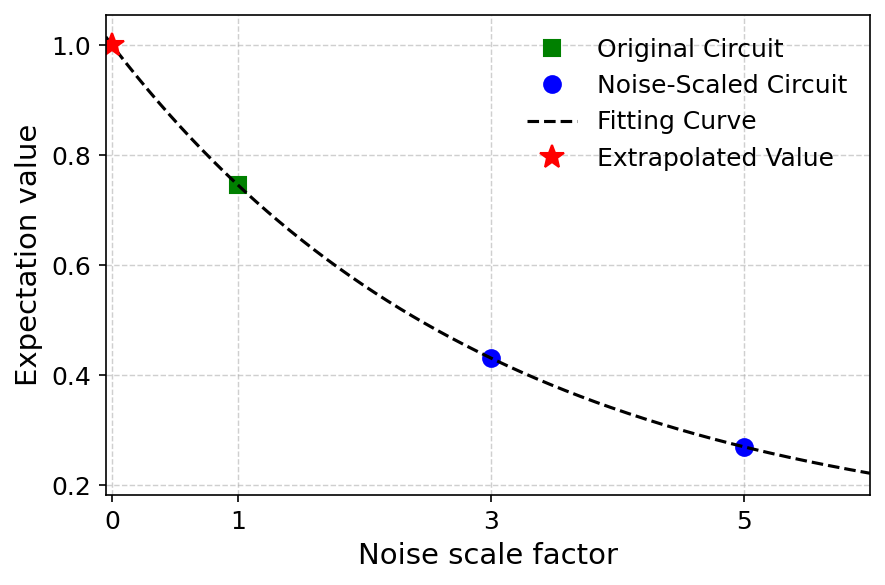

In [92]:
# Plot the data points and the fitting curve with the preferred style
plt.figure(figsize=(6, 4), dpi=150)

# Smooth dashed line for the fit

# Data points with a different color for the special point (x=1)
plt.plot(1, y[0], 's', color='green', markersize=8, label='Original Circuit')  # Special point (x=1)
plt.plot(x[x != 1], y[x != 1], 'o', color='blue', markersize=8, label='Noise-Scaled Circuit')  # Other data points
plt.plot(x_fit, y_fit, linestyle='--', color='black', linewidth=1.5, label='Fitting Curve')  # Fitting curve
# Mark the y-intercept with a star
plt.plot(0, y_intercept, '*', color='red', markersize=12, label='Extrapolated Value')

# Axis labels
plt.xlabel('Noise scale factor', fontsize=14)
plt.ylabel('Expectation value', fontsize=14)

# Customize ticks and x-axis range
plt.xticks([0, 1, 3, 5], fontsize=12)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
plt.xlim(-0.05, 6)  # Restrict x-axis range to -0.05 to 6

# Grid and legend
#plt.grid(True, which='major',linestyle="--", linewidth=0.7, alpha=0.6)
plt.grid(True, axis='x', linestyle="--", linewidth=0.7, alpha=0.6)  # Grid only for x-axis
plt.grid(True, axis='y', linestyle="--", linewidth=0.7, alpha=0.6)  # Grid for major y-axis ticks
plt.legend(fontsize=12, frameon=False, loc='upper right')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("figures/ZNE.pdf", format="pdf", dpi=300)
plt.show()

In [24]:
threshold = 2.5
hadamard_mitigated = hadamard_mitigated[(np.abs(stats.zscore(hadamard_mitigated)) < threshold).all(axis=1)]
hadamard_unmitigated = hadamard_unmitigated[(np.abs(stats.zscore(hadamard_unmitigated)) < threshold).all(axis=1)]
shadow_mitigated = shadow_mitigated[(np.abs(stats.zscore(shadow_mitigated)) < threshold).all(axis=1)]
shadow_unmitigated = shadow_unmitigated[(np.abs(stats.zscore(shadow_unmitigated)) < threshold).all(axis=1)]
shadow_noiseless = shadow_noiseless[(np.abs(stats.zscore(shadow_noiseless)) < threshold).all(axis=1)]
hadamard_noiseless = hadamard_noiseless[(np.abs(stats.zscore(hadamard_noiseless)) < threshold).all(axis=1)]
print(len(hadamard_mitigated), len(hadamard_unmitigated), len(shadow_mitigated), len(shadow_unmitigated), len(shadow_noiseless), len(hadamard_noiseless))

34 36 49 50 10 19


In [25]:
# True values dictionary
true_value_dict = {
    'em_s_off': 0.8947241928, 'em_h_off': -0.954451, 'em_h_diag': -1.0416665, 'em_s0': -1.053513, 'em_t1': -0.8284433437,
    's_off': 0.8947241928, 'h_off': -0.954451, 'h_diag': -1.0416665, 's0': -1.053513, 't1': -0.8284433437
}

# Define a function to get the summary statistics for all columns in a DataFrame
def get_summary_statistics(df):
    df = df.iloc[:, 1:]  # Remove the first column
    summary = df.describe().loc[['mean', 'std', 'min', 'max']]
    #summary = df.describe().loc[['mean', 'std']]
    formatted_summary = summary.map(lambda x: f'{x:.3f}')
    return formatted_summary

# Define a function to calculate MSE and MAE
def calculate_errors(df, true_values):
    mse = {col: mean_squared_error([true_values[col]] * len(df), df[col]) for col in df.columns if col in true_values}
    mae = {col: mean_absolute_error([true_values[col]] * len(df), df[col]) for col in df.columns if col in true_values}
    return mse, mae

# Define a function to format the summary statistics into a single string
def format_summary(name, stats, mse, mae):
    stats_str = f"{name} Summary Statistics:\n"
    stats_str += stats.to_string()
    stats_str += "\nMSE: "
    for col in mse:
        stats_str += f"   {mse[col]:.5f}"
    stats_str += "\nMAE:"
    for col in mae:
        stats_str += f"   {mae[col]:.5f}"
    stats_str += "\n\n"
    return stats_str

# Get the summary statistics and errors for each dataset
hadamard_mitigated_stats = get_summary_statistics(hadamard_mitigated)
hadamard_unmitigated_stats = get_summary_statistics(hadamard_unmitigated)
shadow_mitigated_stats = get_summary_statistics(shadow_mitigated)
shadow_unmitigated_stats = get_summary_statistics(shadow_unmitigated)
shadow_noiseless_stats = get_summary_statistics(shadow_noiseless)
hadamard_noiseless_stats = get_summary_statistics(hadamard_noiseless)

hadamard_mitigated_mse, hadamard_mitigated_mae = calculate_errors(hadamard_mitigated, true_value_dict)
hadamard_unmitigated_mse, hadamard_unmitigated_mae = calculate_errors(hadamard_unmitigated, true_value_dict)
shadow_mitigated_mse, shadow_mitigated_mae = calculate_errors(shadow_mitigated, true_value_dict)
shadow_unmitigated_mse, shadow_unmitigated_mae = calculate_errors(shadow_unmitigated, true_value_dict)
shadow_noiseless_mse, shadow_noiseless_mae = calculate_errors(shadow_noiseless, true_value_dict)
hadamard_noiseless_mse, hadamard_noiseless_mae = calculate_errors(hadamard_noiseless, true_value_dict)

# Format the summary statistics
hadamard_mitigated_str = format_summary("Hadamard Mitigated", hadamard_mitigated_stats, hadamard_mitigated_mse, hadamard_mitigated_mae)
hadamard_unmitigated_str = format_summary("Hadamard Unmitigated", hadamard_unmitigated_stats, hadamard_unmitigated_mse, hadamard_unmitigated_mae)
shadow_mitigated_str = format_summary("Shadow Mitigated", shadow_mitigated_stats, shadow_mitigated_mse, shadow_mitigated_mae)
shadow_unmitigated_str = format_summary("Shadow Unmitigated", shadow_unmitigated_stats, shadow_unmitigated_mse, shadow_unmitigated_mae)
shadow_noiseless_str = format_summary("Shadow Noiseless", shadow_noiseless_stats, shadow_noiseless_mse, shadow_noiseless_mae)
hadamard_noiseless_str = format_summary("Hadamard Noiseless", hadamard_noiseless_stats, hadamard_noiseless_mse, hadamard_noiseless_mae)

print(hadamard_mitigated_str + shadow_mitigated_str +
      hadamard_unmitigated_str + shadow_unmitigated_str + shadow_noiseless_str + hadamard_noiseless_str)

#print(hadamard_mitigated_str + hadamard_unmitigated_str)

Hadamard Mitigated Summary Statistics:
     em_s_off em_h_off em_h_diag   em_s0   em_t1
mean    0.851   -0.966    -1.076  -1.770  -0.699
std     0.082    0.054     0.013   1.312   0.333
min     0.729   -1.101    -1.103  -6.352  -1.078
max     0.991   -0.829    -1.043  -1.068   0.202
MSE:    0.00846   0.00295   0.00135   2.18338   0.12457
MAE:   0.07985   0.04118   0.03421   0.71613   0.28353

Shadow Mitigated Summary Statistics:
     em_s_off em_h_off em_h_diag   em_s0   em_t1
mean    0.856   -0.913    -1.017  -1.040  -0.726
std     0.009    0.009     0.005   0.003   0.030
min     0.838   -0.934    -1.029  -1.046  -0.787
max     0.880   -0.897    -1.003  -1.033  -0.663
MSE:    0.00155   0.00181   0.00063   0.00020   0.01129
MAE:   0.03826   0.04156   0.02449   0.01387   0.10207

Hadamard Unmitigated Summary Statistics:
      s_off   h_off  h_diag      s0      t1
mean  0.293  -0.310  -0.901  -0.937  -0.836
std   0.009   0.008   0.003   0.008   0.014
min   0.270  -0.326  -0.907  -0.957  

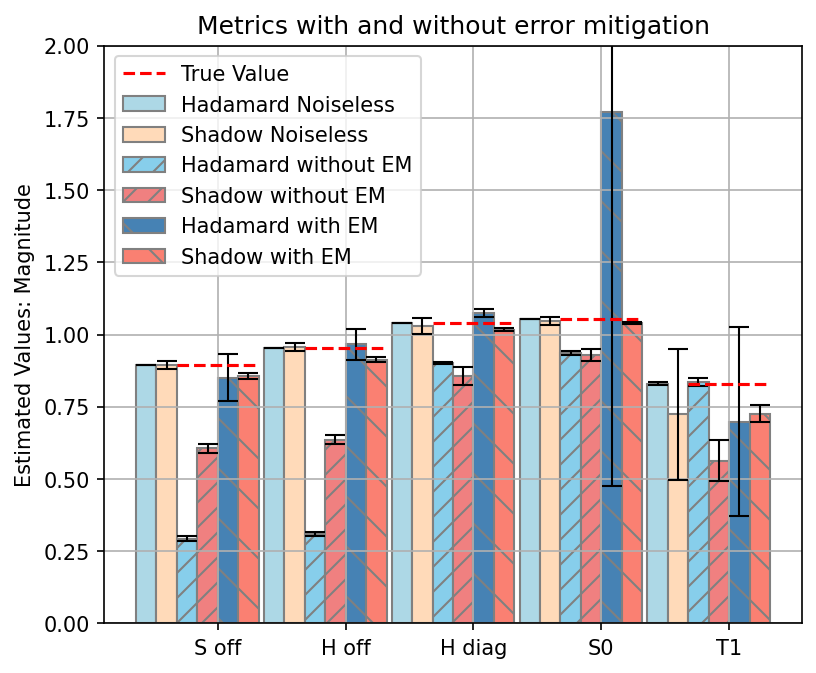

In [5]:
subsystems = ['S off', 'H off', 'H diag', 'S0', 'T1']
ind = np.arange(len(subsystems))  # the x locations for the groups
width = 0.16  # the width of the bars

array_hadamard_unmitigated = np.array([[np.mean(hadamard_unmitigated['s_off']), np.std(hadamard_unmitigated['s_off'])], 
                               [-np.mean(hadamard_unmitigated['h_off']), np.std(hadamard_unmitigated['h_off'])], 
                               [-np.mean(hadamard_unmitigated['h_diag']), np.std(hadamard_unmitigated['h_diag'])],
                                [-np.mean(hadamard_unmitigated['s0']), np.std(hadamard_unmitigated['s0'])], 
                                [-np.mean(hadamard_unmitigated['t1']), np.std(hadamard_unmitigated['t1'])]])

array_hadamard_mitigated = np.array([[np.mean(hadamard_mitigated['em_s_off']), np.std(hadamard_mitigated['em_s_off'])],
                                [-np.mean(hadamard_mitigated['em_h_off']), np.std(hadamard_mitigated['em_h_off'])],
                                [-np.mean(hadamard_mitigated['em_h_diag']), np.std(hadamard_mitigated['em_h_diag'])],
                                [-np.mean(hadamard_mitigated['em_s0']), np.std(hadamard_mitigated['em_s0'])],
                                [-np.mean(hadamard_mitigated['em_t1']), np.std(hadamard_mitigated['em_t1'])]])

array_shadow_unmitigated = np.array([[np.mean(shadow_unmitigated['s_off']), np.std(shadow_unmitigated['s_off'])],
                                 [-np.mean(shadow_unmitigated['h_off']), np.std(shadow_unmitigated['h_off'])],
                                    [-np.mean(shadow_unmitigated['h_diag']), np.std(shadow_unmitigated['h_diag'])],
                                    [-np.mean(shadow_unmitigated['s0']), np.std(shadow_unmitigated['s0'])],
                                    [-np.mean(shadow_unmitigated['t1']), np.std(shadow_unmitigated['t1'])]])
array_shadow_mitigated = np.array([[np.mean(shadow_mitigated['em_s_off']), np.std(shadow_mitigated['em_s_off'])],
                                [-np.mean(shadow_mitigated['em_h_off']), np.std(shadow_mitigated['em_h_off'])],
                                [-np.mean(shadow_mitigated['em_h_diag']), np.std(shadow_mitigated['em_h_diag'])],
                                [-np.mean(shadow_mitigated['em_s0']), np.std(shadow_mitigated['em_s0'])],
                                [-np.mean(shadow_mitigated['em_t1']), np.std(shadow_mitigated['em_t1'])]])

array_shadow_noiseless = np.array([[np.mean(shadow_noiseless['s_off']), np.std(shadow_noiseless['s_off'])],
                                    [-np.mean(shadow_noiseless['h_off']), np.std(shadow_noiseless['h_off'])],
                                    [-np.mean(shadow_noiseless['h_diag']), np.std(shadow_noiseless['h_diag'])],
                                    [-np.mean(shadow_noiseless['s0']), np.std(shadow_noiseless['s0'])],
                                    [-np.mean(shadow_noiseless['t1']), np.std(shadow_noiseless['t1'])]])

array_hadamard_noiseless = np.array([[np.mean(hadamard_noiseless['s_off']), np.std(hadamard_noiseless['s_off'])],
                                    [-np.mean(hadamard_noiseless['h_off']), np.std(hadamard_noiseless['h_off'])],
                                    [-np.mean(hadamard_noiseless['h_diag']), np.std(hadamard_noiseless['h_diag'])],
                                    [-np.mean(hadamard_noiseless['s0']), np.std(hadamard_noiseless['s0'])],
                                    [-np.mean(hadamard_noiseless['t1']), np.std(hadamard_noiseless['t1'])]])

fig, ax = plt.subplots()
# change dpi and figure size
fig.set_dpi(150)
fig.set_size_inches(6, 5)
ax.grid(True)

                                
bar_hadamard_noiseless = ax.bar(ind - width*7/2, array_hadamard_noiseless[:, 0], width, 
                                yerr=array_hadamard_noiseless[:, 1], label='Hadamard Noiseless', 
                                color='lightblue', edgecolor='grey', error_kw=dict(lw=1, capsize=5, capthick=1))

bar_shadow_noiseless = ax.bar(ind - width*5/2, array_shadow_noiseless[:, 0], width, 
                              yerr=array_shadow_noiseless[:, 1], label='Shadow Noiseless', 
                              color='peachpuff', edgecolor='grey', error_kw=dict(lw=1, capsize=5, capthick=1))

bar_hadamard_unmitigated = ax.bar(ind - width*3/2, array_hadamard_unmitigated[:, 0], width, 
                                  yerr=array_hadamard_unmitigated[:, 1], label='Hadamard without EM', 
                                  color='skyblue', edgecolor='grey', hatch='//', error_kw=dict(lw=1, capsize=5, capthick=1))

bar_shadow_unmitigated = ax.bar(ind - width/2, array_shadow_unmitigated[:, 0], width, 
                                yerr=array_shadow_unmitigated[:, 1], label='Shadow without EM', 
                                color='lightcoral', edgecolor='grey', hatch='//', error_kw=dict(lw=1, capsize=5, capthick=1))

bar_hadamard_mitigated = ax.bar(ind + width/2, array_hadamard_mitigated[:, 0], width, 
                                yerr=array_hadamard_mitigated[:, 1], label='Hadamard with EM', 
                                color='steelblue', edgecolor='grey', hatch='\\', error_kw=dict(lw=1, capsize=5, capthick=1))

bar_shadow_mitigated = ax.bar(ind + width*3/2, array_shadow_mitigated[:, 0], width, 
                              yerr=array_shadow_mitigated[:, 1], label='Shadow with EM', 
                              color='salmon', edgecolor='grey', hatch='\\', error_kw=dict(lw=1, capsize=5, capthick=1))

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Estimated Values: Magnitude')
ax.set_title('Metrics with and without error mitigation')
ax.set_xticks(ind)
ax.set_xticklabels(subsystems)
ax.plot([], [], color='r', linestyle='dashed', label='True Value')
ax.legend()

# Function to add true value markers with horizontal lines
def add_true_value_markers(ax, ind, width, true_values):
    for i, sys in enumerate(subsystems):
        # Lines for without error mitigation
        ax.hlines(y=abs(true_values[sys]), xmin=ind[i] - 2*width, xmax=ind[i] + 2*width, colors='r', linestyles='dashed')

true_values = {
    'S off': 0.8947241928601519,
    'H off': -0.9544514644714568,
    'H diag': -1.0416665061528663,
    'S0': -1.0535137399660863,
    'T1': -0.8284433437356912,
}

# Adding the true value markers 
add_true_value_markers(ax, ind, width, true_values)

# Function to add error bars to the bars
def add_error_bars(rects, ax, std):
    for rect, e in zip(rects, std):
        height = rect.get_height()
        ax.errorbar(rect.get_x() + rect.get_width() / 2, height, yerr=e, fmt='none', color='black', capsize=5)

# Setting the y-axis limit similar to the provided plot
ax.set_ylim(0, 2)
plt.show()

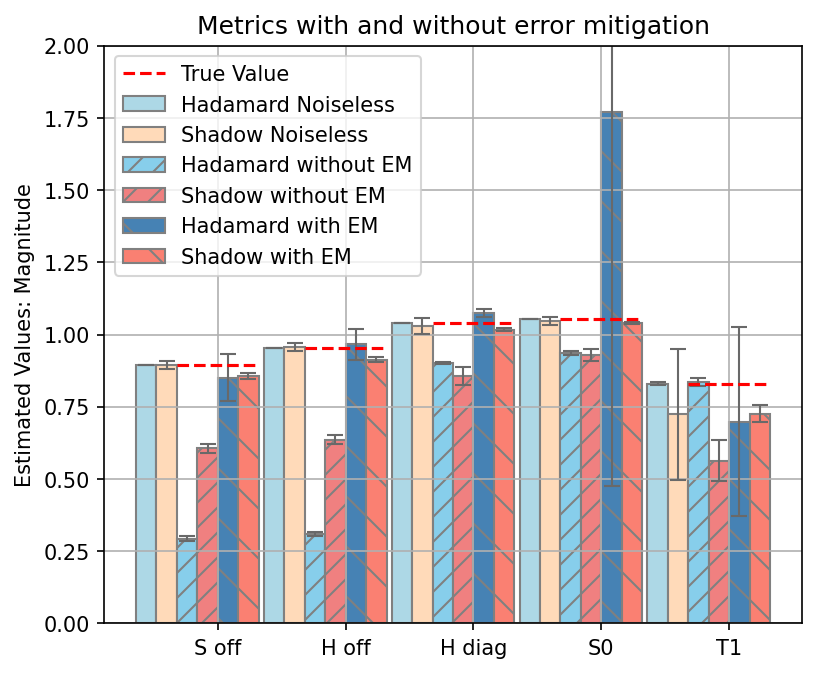

In [39]:
subsystems = ['S off', 'H off', 'H diag', 'S0', 'T1']
ind = np.arange(len(subsystems))  # the x locations for the groups
width = 0.16  # the width of the bars

array_hadamard_unmitigated = np.array([[np.mean(hadamard_unmitigated['s_off']), np.std(hadamard_unmitigated['s_off'])], 
                               [-np.mean(hadamard_unmitigated['h_off']), np.std(hadamard_unmitigated['h_off'])], 
                               [-np.mean(hadamard_unmitigated['h_diag']), np.std(hadamard_unmitigated['h_diag'])],
                                [-np.mean(hadamard_unmitigated['s0']), np.std(hadamard_unmitigated['s0'])], 
                                [-np.mean(hadamard_unmitigated['t1']), np.std(hadamard_unmitigated['t1'])]])

array_hadamard_mitigated = np.array([[np.mean(hadamard_mitigated['em_s_off']), np.std(hadamard_mitigated['em_s_off'])],
                                [-np.mean(hadamard_mitigated['em_h_off']), np.std(hadamard_mitigated['em_h_off'])],
                                [-np.mean(hadamard_mitigated['em_h_diag']), np.std(hadamard_mitigated['em_h_diag'])],
                                [-np.mean(hadamard_mitigated['em_s0']), np.std(hadamard_mitigated['em_s0'])],
                                [-np.mean(hadamard_mitigated['em_t1']), np.std(hadamard_mitigated['em_t1'])]])

array_shadow_unmitigated = np.array([[np.mean(shadow_unmitigated['s_off']), np.std(shadow_unmitigated['s_off'])],
                                 [-np.mean(shadow_unmitigated['h_off']), np.std(shadow_unmitigated['h_off'])],
                                    [-np.mean(shadow_unmitigated['h_diag']), np.std(shadow_unmitigated['h_diag'])],
                                    [-np.mean(shadow_unmitigated['s0']), np.std(shadow_unmitigated['s0'])],
                                    [-np.mean(shadow_unmitigated['t1']), np.std(shadow_unmitigated['t1'])]])
array_shadow_mitigated = np.array([[np.mean(shadow_mitigated['em_s_off']), np.std(shadow_mitigated['em_s_off'])],
                                [-np.mean(shadow_mitigated['em_h_off']), np.std(shadow_mitigated['em_h_off'])],
                                [-np.mean(shadow_mitigated['em_h_diag']), np.std(shadow_mitigated['em_h_diag'])],
                                [-np.mean(shadow_mitigated['em_s0']), np.std(shadow_mitigated['em_s0'])],
                                [-np.mean(shadow_mitigated['em_t1']), np.std(shadow_mitigated['em_t1'])]])

array_shadow_noiseless = np.array([[np.mean(shadow_noiseless['s_off']), np.std(shadow_noiseless['s_off'])],
                                    [-np.mean(shadow_noiseless['h_off']), np.std(shadow_noiseless['h_off'])],
                                    [-np.mean(shadow_noiseless['h_diag']), np.std(shadow_noiseless['h_diag'])],
                                    [-np.mean(shadow_noiseless['s0']), np.std(shadow_noiseless['s0'])],
                                    [-np.mean(shadow_noiseless['t1']), np.std(shadow_noiseless['t1'])]])

array_hadamard_noiseless = np.array([[np.mean(hadamard_noiseless['s_off']), np.std(hadamard_noiseless['s_off'])],
                                    [-np.mean(hadamard_noiseless['h_off']), np.std(hadamard_noiseless['h_off'])],
                                    [-np.mean(hadamard_noiseless['h_diag']), np.std(hadamard_noiseless['h_diag'])],
                                    [-np.mean(hadamard_noiseless['s0']), np.std(hadamard_noiseless['s0'])],
                                    [-np.mean(hadamard_noiseless['t1']), np.std(hadamard_noiseless['t1'])]])

fig, ax = plt.subplots()
# change dpi and figure size
fig.set_dpi(150)
fig.set_size_inches(6, 5)
ax.grid(True)

error_bar_config = dict(lw=1, capsize=4, capthick=1, ecolor='dimgray')
edge_color = 'grey'                                
bar_hadamard_noiseless = ax.bar(ind - width*7/2, array_hadamard_noiseless[:, 0], width, 
                                yerr=array_hadamard_noiseless[:, 1], label='Hadamard Noiseless', 
                                color='lightblue', edgecolor=edge_color, error_kw=error_bar_config)

bar_shadow_noiseless = ax.bar(ind - width*5/2, array_shadow_noiseless[:, 0], width, 
                              yerr=array_shadow_noiseless[:, 1], label='Shadow Noiseless', 
                              color='peachpuff', edgecolor=edge_color, error_kw=error_bar_config)

bar_hadamard_unmitigated = ax.bar(ind - width*3/2, array_hadamard_unmitigated[:, 0], width, 
                                  yerr=array_hadamard_unmitigated[:, 1], label='Hadamard without EM', 
                                  color='skyblue', edgecolor=edge_color, hatch='//', error_kw=error_bar_config)

bar_shadow_unmitigated = ax.bar(ind - width/2, array_shadow_unmitigated[:, 0], width, 
                                yerr=array_shadow_unmitigated[:, 1], label='Shadow without EM', 
                                color='lightcoral', edgecolor=edge_color, hatch='//', error_kw=error_bar_config)

bar_hadamard_mitigated = ax.bar(ind + width/2, array_hadamard_mitigated[:, 0], width, 
                                yerr=array_hadamard_mitigated[:, 1], label='Hadamard with EM', 
                                color='steelblue', edgecolor=edge_color, hatch='\\', error_kw=error_bar_config)

bar_shadow_mitigated = ax.bar(ind + width*3/2, array_shadow_mitigated[:, 0], width, 
                              yerr=array_shadow_mitigated[:, 1], label='Shadow with EM', 
                              color='salmon', edgecolor=edge_color, hatch='\\', error_kw=error_bar_config)

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Estimated Values: Magnitude')
ax.set_title('Metrics with and without error mitigation')
ax.set_xticks(ind)
ax.set_xticklabels(subsystems)
ax.plot([], [], color='r', linestyle='dashed', label='True Value')
ax.legend()

# Function to add true value markers with horizontal lines
def add_true_value_markers(ax, ind, width, true_values):
    for i, sys in enumerate(subsystems):
        # Lines for without error mitigation
        ax.hlines(y=abs(true_values[sys]), xmin=ind[i] - 2*width, xmax=ind[i] + 2*width, colors='r', linestyles='dashed')

true_values = {
    'S off': 0.8947241928601519,
    'H off': -0.9544514644714568,
    'H diag': -1.0416665061528663,
    'S0': -1.0535137399660863,
    'T1': -0.8284433437356912,
}

# Adding the true value markers 
add_true_value_markers(ax, ind, width, true_values)

# Function to add error bars to the bars
def add_error_bars(rects, ax, std):
    for rect, e in zip(rects, std):
        height = rect.get_height()
        ax.errorbar(rect.get_x() + rect.get_width() / 2, height, yerr=e, fmt='none', color='black', capsize=5)

# Setting the y-axis limit similar to the provided plot
ax.set_ylim(0, 2)
plt.show()

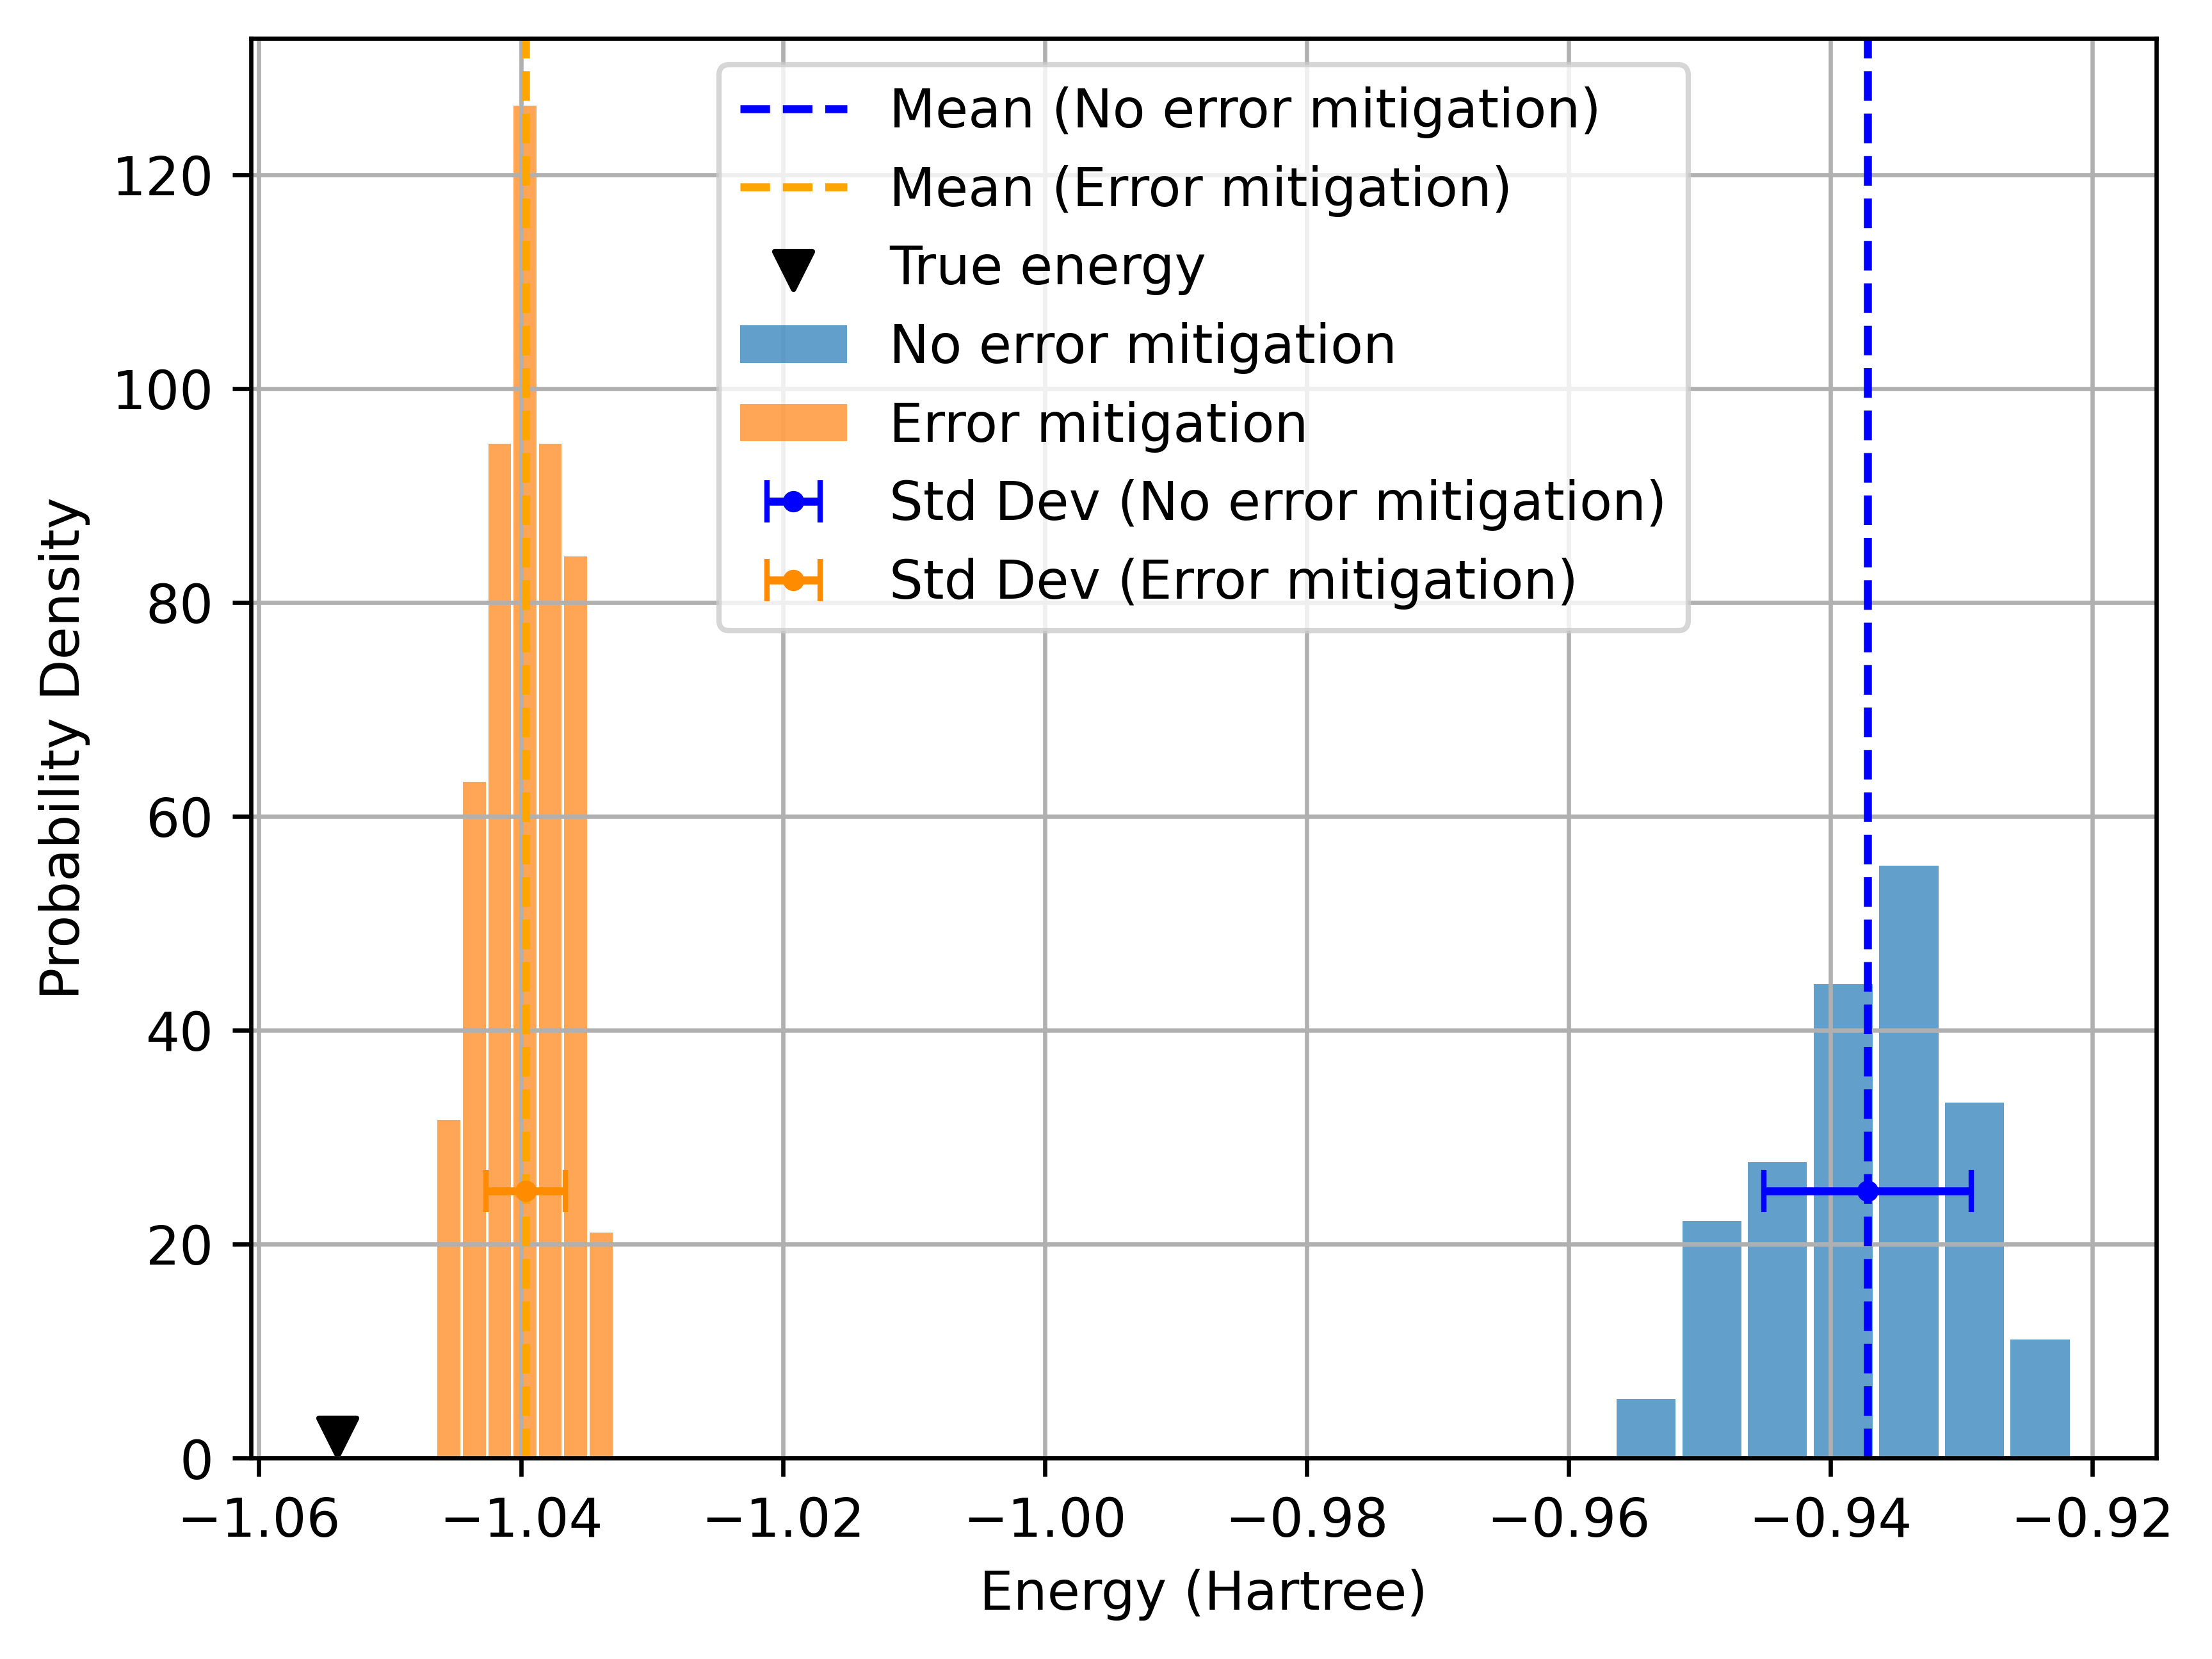

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming hadamard_mitigated and shadow_mitigated are dictionaries containing the data
data1 = np.array(hadamard_unmitigated['s0'])
data2 = np.array(shadow_mitigated['em_s0'])

mean1 = np.mean(data1)
std1 = np.std(data1)
mean2 = np.mean(data2)
std2 = np.std(data2)

# Calculate histogram and bin edges for data1
hist1, bins1 = np.histogram(data1, bins='auto', density=True)
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2

# Calculate histogram and bin edges for data2
hist2, bins2 = np.histogram(data2, bins='auto', density=True)
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

plt.figure(dpi=600)

# Plot histograms
plt.bar(bin_centers1, hist1, width=0.9*(bin_centers1[1] - bin_centers1[0]), align='center', alpha=0.7, label='No error mitigation')
plt.bar(bin_centers2, hist2, width=0.9*(bin_centers2[1] - bin_centers2[0]), align='center', alpha=0.7, label='Error mitigation')

# Plot mean lines
plt.axvline(mean1, linestyle='dashed', color='blue', label='Mean (No error mitigation)')
plt.axvline(mean2, linestyle='dashed', color='orange', label='Mean (Error mitigation)')

# Plot true fidelity marker
plt.scatter(-1.054, 2, marker='v', color='black', label='True energy', s=50)

# Plot error bars for standard deviation
plt.errorbar(mean1, 25, xerr=std1, fmt='.', color='blue', capsize=4, label='Std Dev (No error mitigation)')
plt.errorbar(mean2, 25, xerr=std2, fmt='.', color='darkorange', capsize=4, label='Std Dev (Error mitigation)')

plt.xlabel('Energy (Hartree)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
# plt.ylim(0, 2.5)
# plt.xlim(-2, 0)
plt.show()


In [8]:
# def eigensolver(s, hoff, hdiag):
#     eigvals = []
#     eigvals.append((hdiag.real + hoff.real)/(1 + s))
#     eigvals.append((hdiag.real - hoff.real)/(1 - s))
#     return eigvals
# shadow_unmitigated['eigvals'] = shadow_unmitigated.apply(lambda x: eigensolver(x['s_off'], x['h_off'], x['h_diag']), axis=1)
# shadow_unmitigated['eig1'] = shadow_unmitigated['eigvals'].apply(lambda x: x[0])
# shadow_unmitigated['eig2'] = shadow_unmitigated['eigvals'].apply(lambda x: x[1])

# shadow_unmitigated['eig1'].mean(), shadow_unmitigated['eig1'].std(), shadow_unmitigated['eig2'].mean(), shadow_unmitigated['eig2'].std()

In [21]:
from scipy.stats import zscore
threshold = 2.5

def remove_outliers(data, columns, threshold):
    z_scores = np.abs(zscore(data[columns]))
    return data[(z_scores < threshold).all(axis=1)]

def calculate_stats(files, columns, remove_outliers_flag=False):
    stats = {f"{col}_mean": [] for col in columns}
    stats.update({f"{col}_std": [] for col in columns})
    stats.update({f"{col}_mse": [] for col in columns})
    stats.update({f"{col}_mse_std": [] for col in columns})

    for file in files:
        data = pd.read_csv(folder_name + file)
        if remove_outliers_flag:
            data = remove_outliers(data, columns, threshold)
        for column in columns:
            mean_value = np.mean(data[column])
            std_value = np.std(data[column])
            mse_value = np.mean((data[column] - true_value_dict[column]) ** 2)
            mse_std_value = np.std((data[column] - true_value_dict[column]) ** 2)
            stats[f"{column}_mean"].append(mean_value)
            stats[f"{column}_std"].append(std_value)
            stats[f"{column}_mse"].append(mse_value)
            stats[f"{column}_mse_std"].append(mse_std_value)

    return stats

# Calculate stats for shadow and hadamard, both unmitigated and mitigated
shadow_unmitigated_stats = calculate_stats(shadow_unmitigated_files, columns)
shadow_mitigated_stats = calculate_stats(shadow_mitigated_files, columns)
hadamard_unmitigated_stats = calculate_stats(hadamard_unmitigated_files, columns)
hadamard_mitigated_stats = calculate_stats(hadamard_mitigated_files, columns, remove_outliers_flag=True)

shadow_unmitigated_df = pd.DataFrame(shadow_unmitigated_stats)
shadow_mitigated_df = pd.DataFrame(shadow_mitigated_stats)
hadamard_unmitigated_df = pd.DataFrame(hadamard_unmitigated_stats)
hadamard_mitigated_df = pd.DataFrame(hadamard_mitigated_stats)

hadamard_unmitigated_std = hadamard_unmitigated_df["s_off_std"]
hadamard_mitigated_std = hadamard_mitigated_df["s_off_std"]
shadow_unmitigated_std = shadow_unmitigated_df["s_off_std"]
shadow_mitigated_std = shadow_mitigated_df["s_off_std"]